In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
model = load_model('model.h5')

In [3]:
expressions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
classifier =load_model('model.h5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('./testing images/video.mp4')

while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(230, 230, 50),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x+10,y+25)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_DUPLEX,1,(230, 230, 50),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2FONT_HERSHEY_DUPLEX,1,(230, 230, 50),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 176ms/step
Disgust


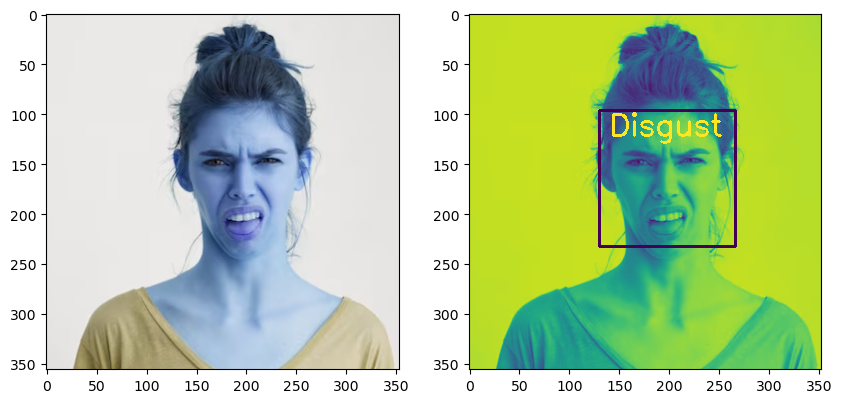

In [6]:
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
classifier =load_model('model.h5')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

image = cv2.imread('./testing images/disgust.png')
img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(img)

for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,255),2)
    roi = img[y:y+h,x:x+w]
    roi = cv2.resize(roi,(48,48),interpolation=cv2.INTER_AREA)

    if np.sum([roi])!=0:
        roi = roi.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        prediction = classifier.predict(roi)[0]
        label=emotion_labels[prediction.argmax()]
        label_position = (x+10,y+25)
        cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
    else:
        cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
print(emotion_labels[prediction.argmax()])
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(img)